In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


# <center> Water Quality </center> 

<center> <img src="https://media.istockphoto.com/photos/analyzing-samples-picture-id182188515?k=6&m=182188515&s=612x612&w=0&h=Hcjly5YZGs4tFxPmD6Q-hbCKcoGFU-JIPT8qLaYDUOQ="> </center>

## About dataset

#### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. 
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
# It is always consider as a good practice to make a copy of original dataset.

main_df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
df = main_df.copy()

In [3]:
# Getting top 5 row of the dataset

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Following are the list of algorithms that are used in this notebook.

|    Algorithm         | 
| -------------------- | 
| Logistic Regression  |
| Decision Tree|
| Random Forest|
| XGBoost|
| KNeighbours|
| SVM|
| AdaBoost|

In [5]:
print(df.shape)

(3276, 10)


In [6]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [10]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<AxesSubplot:>

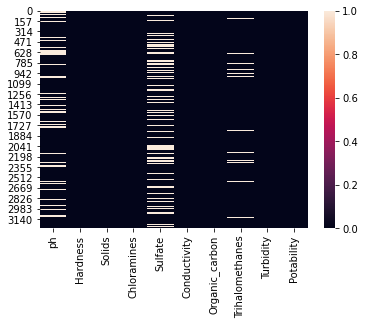

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:>

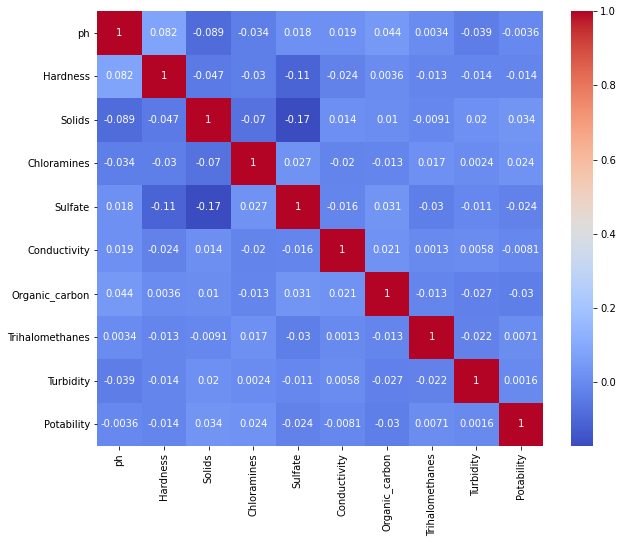

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [14]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

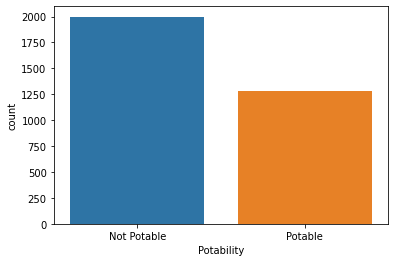

In [15]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [16]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

0    1998
1    1278
Name: Potability, dtype: int64


<AxesSubplot:xlabel='Potability', ylabel='ph'>

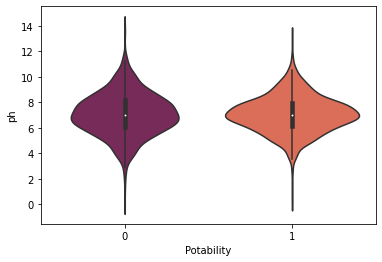

In [17]:
sns.violinplot(x='Potability', y='ph', data=df, palette='rocket')

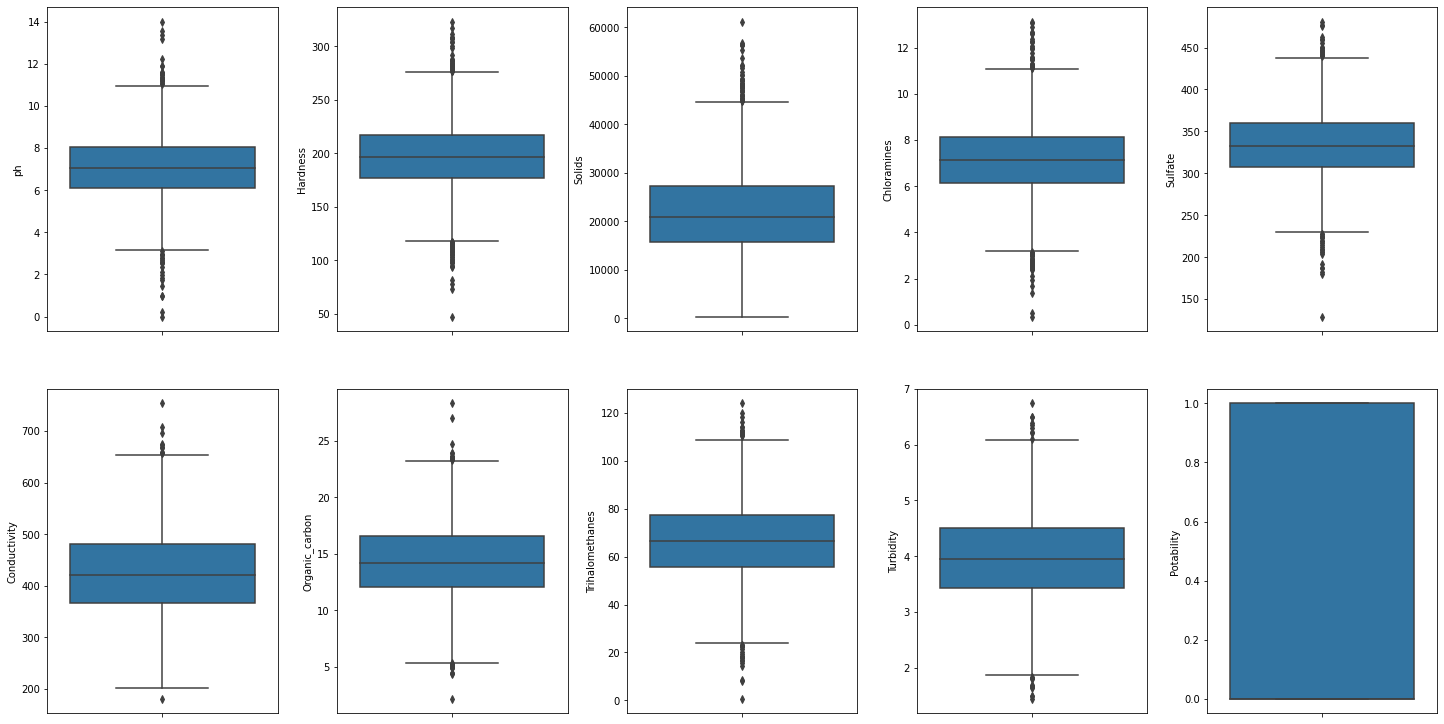

In [18]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

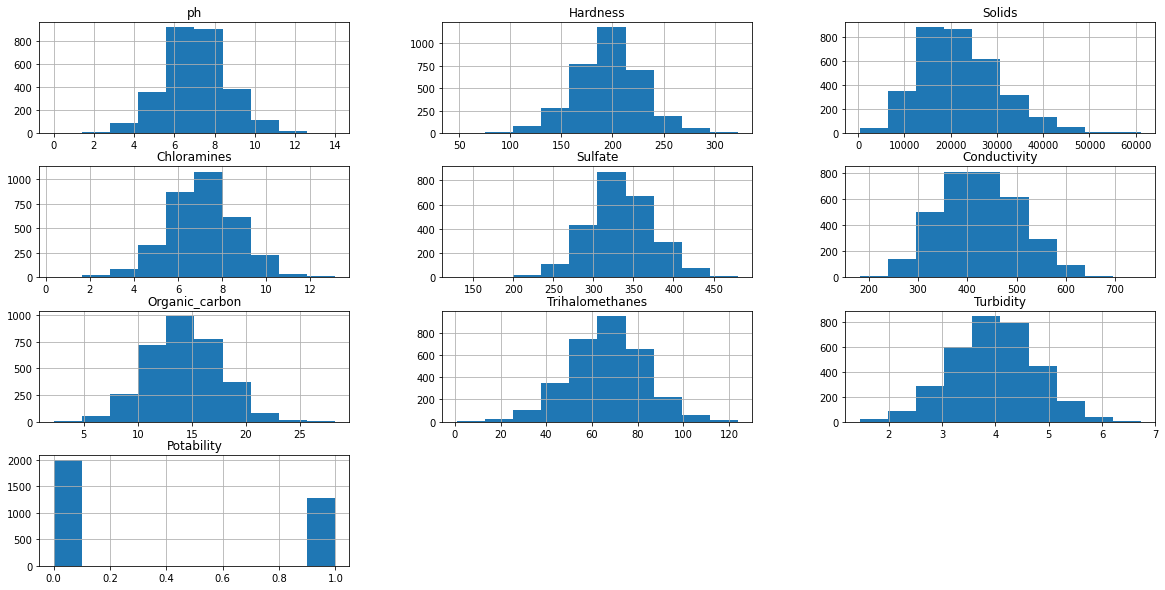

In [19]:
plt.rcParams['figure.figsize'] = [20,10]
df.hist()
plt.show()

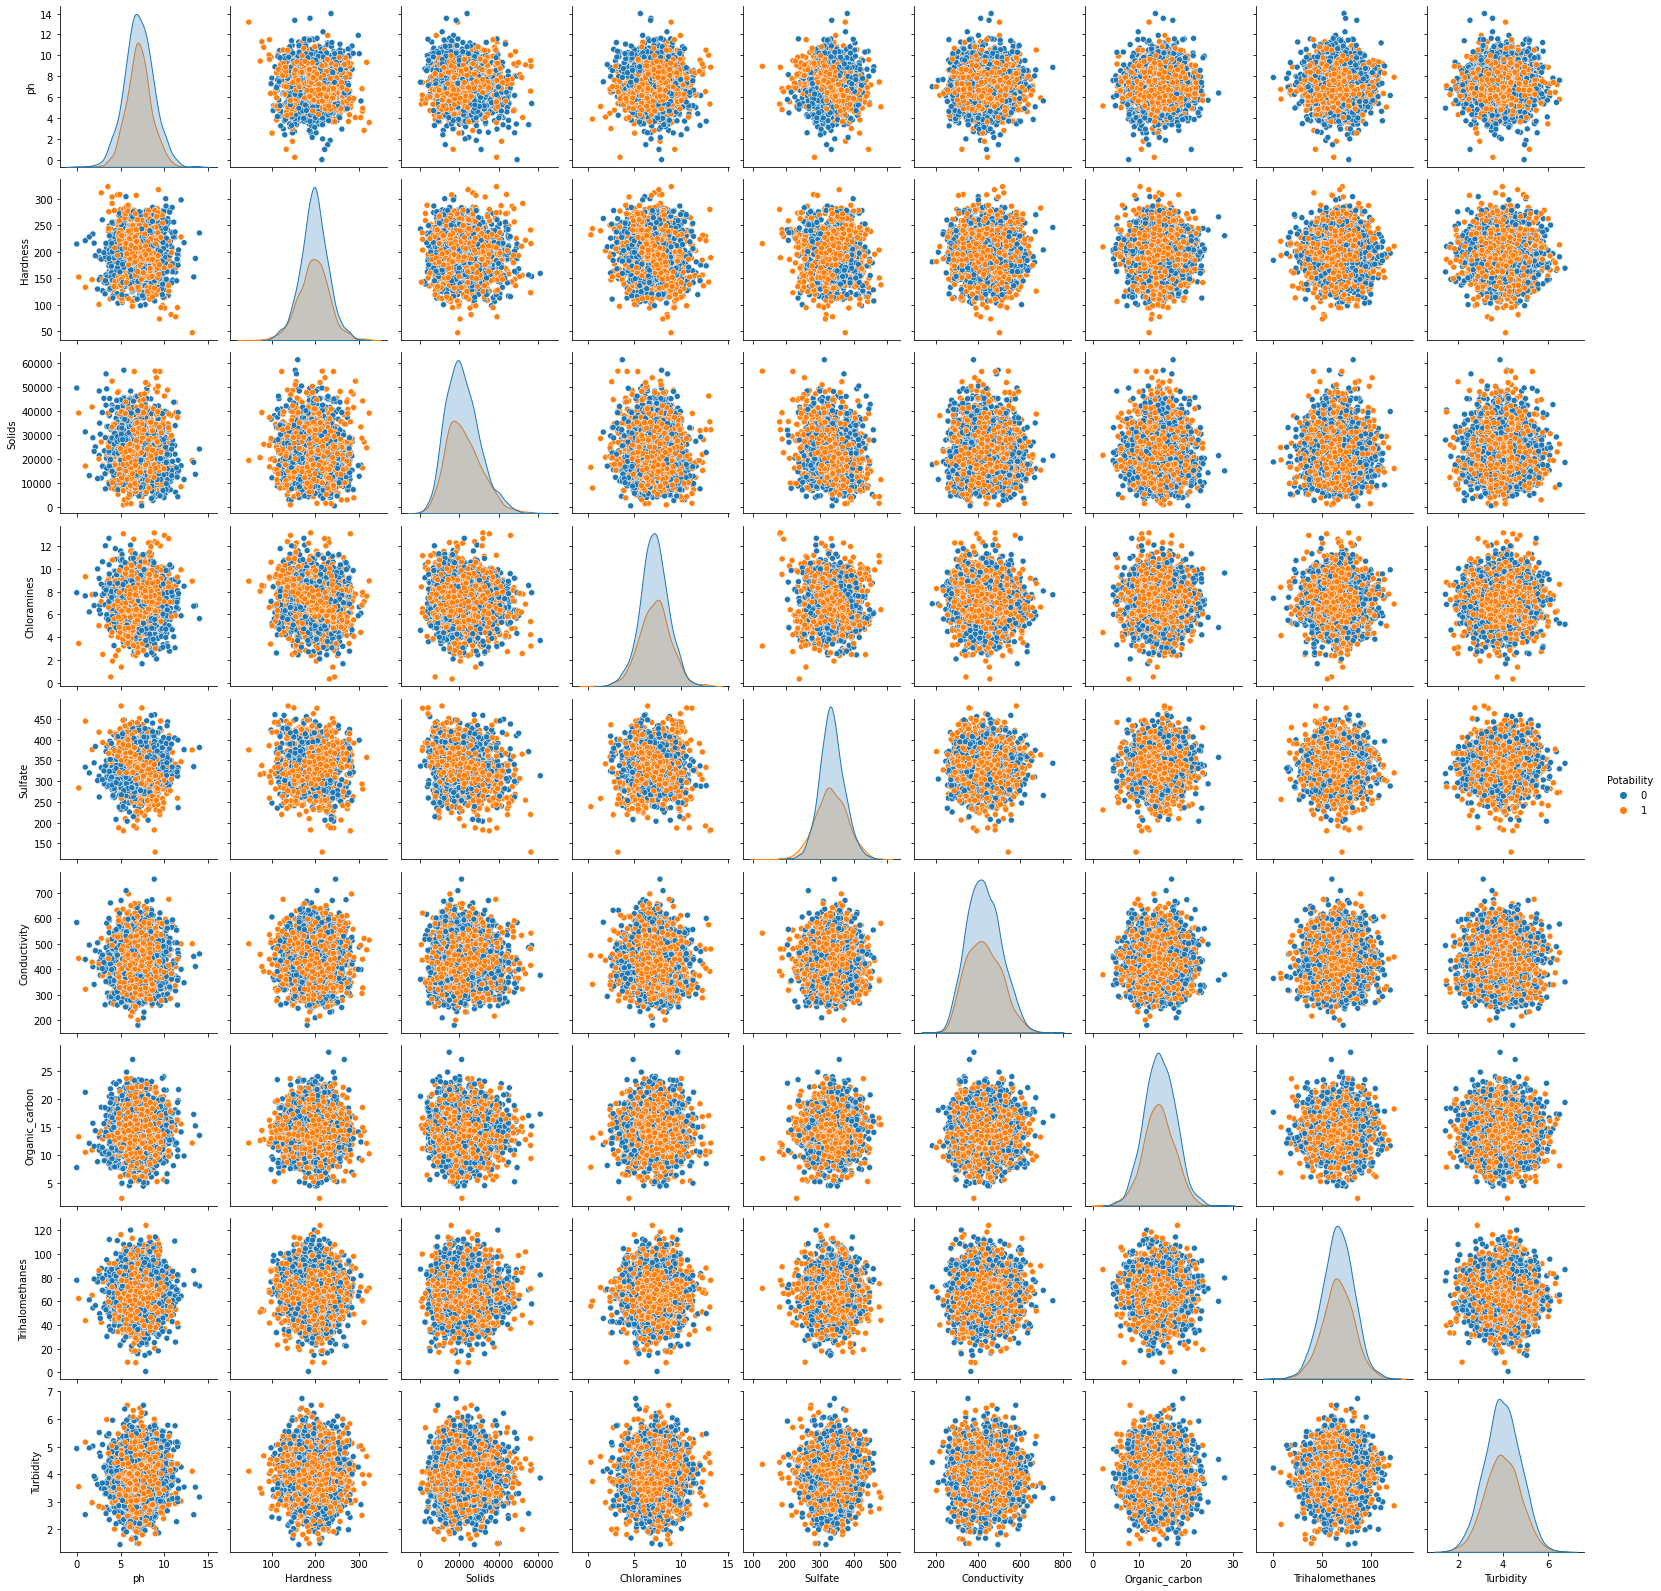

In [20]:
sns.pairplot(df, hue="Potability")

<AxesSubplot:xlabel='Potability', ylabel='Density'>

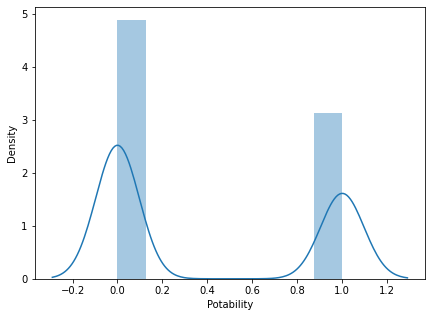

In [21]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(df['Potability'])

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

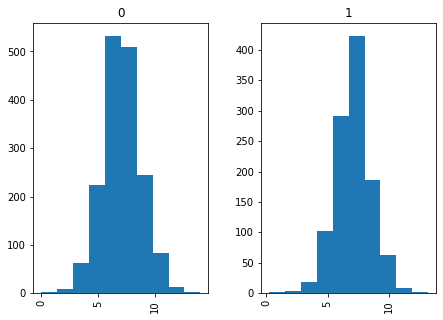

In [22]:
df.hist(column='ph', by='Potability')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

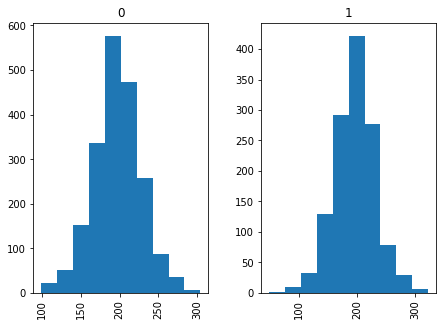

In [23]:
df.hist(column='Hardness', by='Potability')

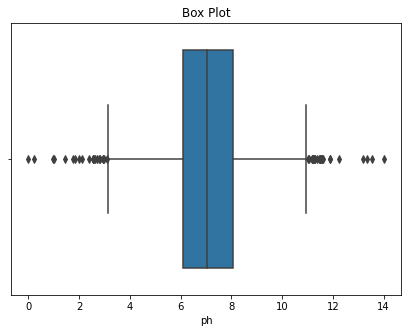

In [24]:
# Individual box plot for each feature
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['ph'])

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

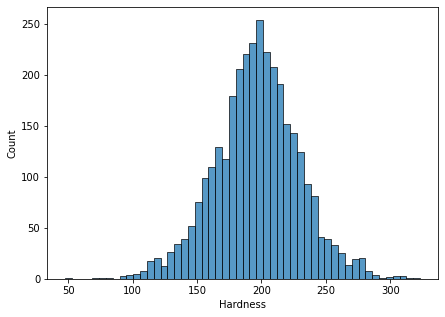

In [25]:
sns.histplot(x = "Hardness", data=df)

In [26]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [27]:
skew_val = df.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.025630
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.035947
Hardness          -0.039342
Trihalomethanes   -0.083031
dtype: float64

* Using pandas skew function to check the correlation between the values.
* Values between 0.5 to  -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

In [28]:
fig = px.box(df, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

In [29]:
fig = px.box(df, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

In [30]:
fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [31]:
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

In [32]:
fig =  px.pie (df, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

In [33]:
fig = px.scatter (df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

In [34]:
fig = px.scatter (df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

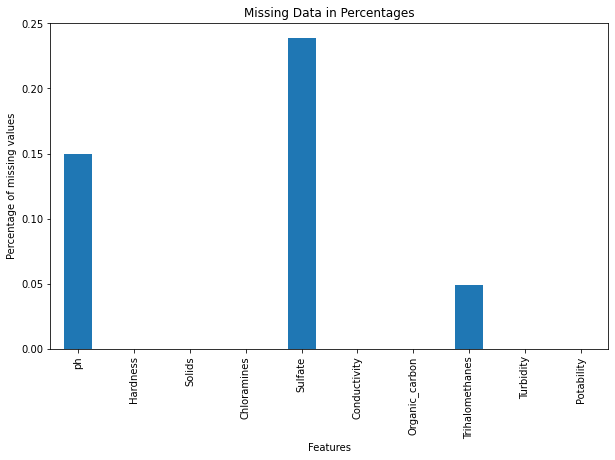

In [35]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [36]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [37]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<AxesSubplot:>

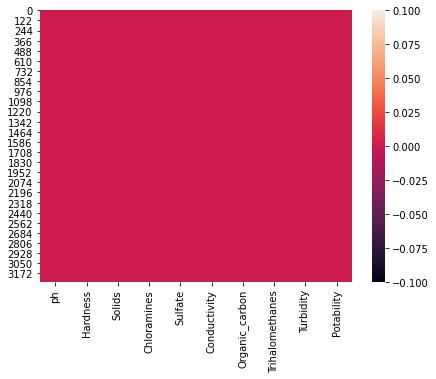

In [38]:
sns.heatmap(df.isnull())

In [39]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [40]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [41]:
X.shape, y.shape

((3276, 9), (3276,))

In [42]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [43]:
X = scaler.fit_transform(X)
X

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [44]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Using Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [47]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [48]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [49]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [50]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.6284658040665434


In [51]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot:>

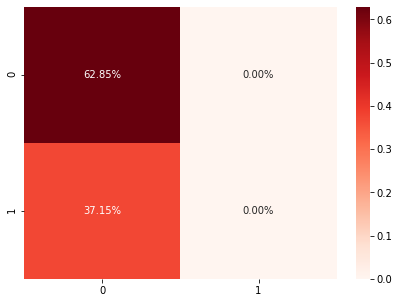

In [52]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [55]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [56]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [57]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6451016635859519


In [58]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



<AxesSubplot:>

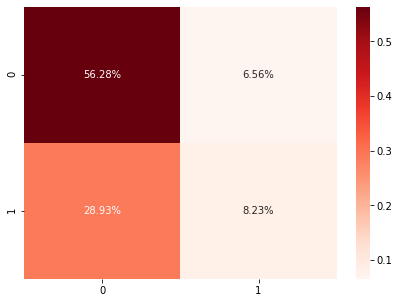

In [59]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using Random Forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [62]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [63]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [64]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.6284658040665434


In [65]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot:>

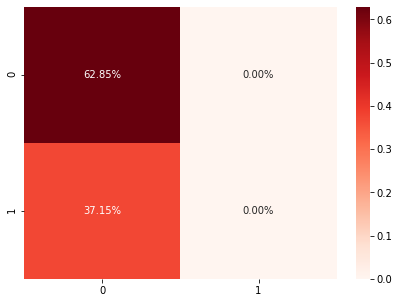

In [66]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using XGBoost Classifier

In [67]:
from xgboost import XGBClassifier

In [68]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [69]:
# Training Model
model_xgb.fit(X_train, y_train)

[08:10:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=125, n_jobs=5, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [71]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.6709796672828097


In [72]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.61      0.31      0.41       402

    accuracy                           0.67      1082
   macro avg       0.65      0.60      0.59      1082
weighted avg       0.66      0.67      0.64      1082



<AxesSubplot:>

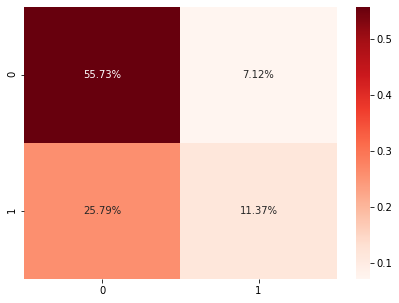

In [73]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using KNeighbours

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [76]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [77]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [78]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.6534195933456562


In [79]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



<AxesSubplot:>

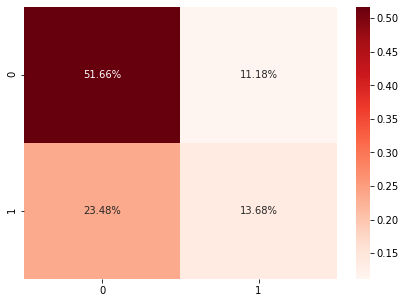

In [80]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Using SVM

In [81]:
from sklearn.svm import SVC, LinearSVC

In [82]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [83]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [84]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [85]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.6885397412199631


In [86]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



<AxesSubplot:>

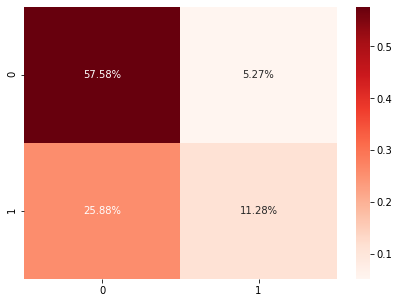

In [87]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [88]:
## Using AdaBoost Classifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [91]:
model_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [92]:
# Making Prediction
pred_ada = model_ada.predict(X_test)

In [93]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.634011090573013


In [94]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.62      0.04      0.07       402

    accuracy                           0.63      1082
   macro avg       0.62      0.51      0.42      1082
weighted avg       0.63      0.63      0.51      1082



<AxesSubplot:>

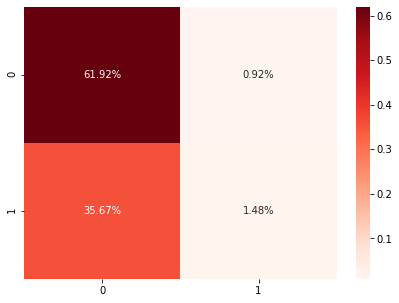

In [95]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
5,SVM,0.688540
3,XGBoost,0.670980
4,KNeighbours,0.653420
1,Decision Tree,0.645102
6,AdaBoost,0.634011
0,Logistic Regression,0.628466
2,Random Forest,0.628466


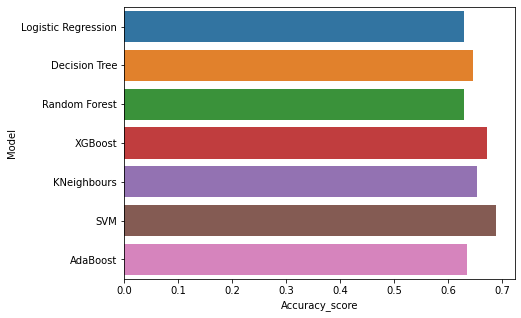

In [96]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

#### Conclusion :- Here SVM classifier has achieved highest accuracy.